## Task 2 & 3

Using Google's universal encoder, calculate semantic similarity between two phrases.
For it, load the model and calculate the semantic similarity.
For bucketing, calculate the value between two phrases in documents and seperate them by the thresholding value.

In [2]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import pickle

In [23]:
# Load the pre-trained parameters.
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


[[0.99999976 0.7802409  0.31739876 0.68789995]
 [0.7802409  1.0000005  0.461112   0.36889154]
 [0.31739876 0.461112   0.99999964 0.31675404]
 [0.68789995 0.36889154 0.31675404 1.0000001 ]]


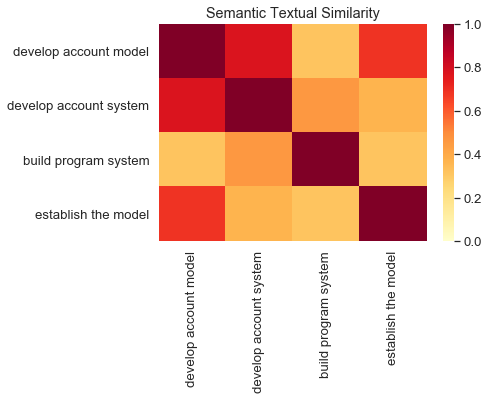

In [24]:
# Calculate the value of semantic similarity between the other phrases in messages.
def semantic_similarity(msgs):
    features = embed(msgs)
    corr = np.inner(features, features)
    return corr

def plot_similarity(msgs):
    features = semantic_similarity(msgs)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        features,
        xticklabels=msgs,
        yticklabels=msgs,
        vmin=0,
        vmax=1,
        cmap="YlOrRd")
    g.set_xticklabels(msgs, rotation=90)
    g.set_title("Semantic Textual Similarity")

msgs = ['develop account model', 'develop account system', 'build program system', 'establish the model']
print(semantic_similarity(msgs))
plot_similarity(msgs)

In [25]:
# Seperate the phrases to three buckets
def bucket_phrases(first, second, thres):
    first_only, second_only, both = [], [], []
    sids = []
    
    for i, f_phrase in enumerate(first):
        mx, sid = 0, -1
        for j, s_phrase in enumerate(second):
            res = semantic_similarity([f_phrase, s_phrase])[1][0]
            if (res > mx):
                mx = res
                sid = j
        if (mx > thres):
            both.append((first[i], second[sid], mx))
            sids.append(sid)
        else:
            first_only.append(first[i])
            
    for i, s_phrase in enumerate(second):
        if i not in sids:
            second_only.append(s_phrase)
            
    return first_only, second_only, both

# Load the phrases from pickle
with open('role_phrases.pickle', 'rb') as f:
    role = pickle.load(f)
with open('resume_phrases.pickle', 'rb') as f:
    resume = pickle.load(f)
    
first, second, both = bucket_phrases(role, resume, 0.4)

print("--- First Only ---\n\n", '\n'.join(first), "\n\n")
print("--- Second Only --\n\n", '\n'.join(second), "\n\n")

print("----   Both   ----\n")
for x in both:
    print(x[0] + '\n' +  x[1] + '\n' + "Point: " + str(x[2]) + '\n')

--- First Only ---

 role 1
speak to these needs –
develop high quality presentations
develop proposals
develop software demonstrations
build a consensus for change on a multi stakeholder basis
ensure proper technical business fit
professional demos
need to ensure prospective customers aligned technically with the sales process
role 2
extensive delivery of platform within a Business Intelligence function
communication with stakeholders on all levels
build dashboarding
identify data sources
understand experience within KPIs
background within Utilities
background within Energy
background within Oil
background within Gas
role 3
key Responsibilities
foster their competitive advantage
enhance digital transformation roadmaps
develop C suite of business relationships within the customer organization
implement innovation programs – governance
guide innovation programs – governance
guide portfolio mix
guide business fit
define innovation programs – governance
define business fit
drive innovatio